200 200 200


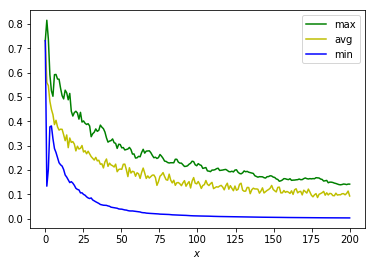

In [5]:
### 2変数関数の偏微分 ####
## ニューロンの練習
import numpy as np

neuron_num = 2

class Neuron:
    
    def __init__(self, n):
        self.w = np.random.rand(n)  # setされた次元数
#         self.b = np.random.rand(1)  # [] 1次元の要素をバイアスに与える
        self.b = 1   # バイアスがランダムや小数点になるだけで収束率がかなり違う
        self.y = None 
        self.s = None 
        self.error_list = []
        self.output_y_max = []
        self.output_y_avg = []
        self.output_y_min = []
        
#     def set_state(self, x, w, b):
#         self.s = (x.dot(self.w))+1*self.b
#         return self.s

#     def activate(self, s):
#         self.y = 1 / (1 + np.exp(-self.s))
#         return self.y

    def correct(self):
        """受け取ったnp_x配列からt値をランダムに生成する(t値は条件下で作る)"""
        np_x = np.array(np.round(np.random.rand(neuron_num)))
        return np_x, 0 if (np_x[np_x== 0.0].size) else 1
    
    def learn(self, r):
        """
        y : 予測値
        r : ハイパーパラメーター
        """
        for i in range(10000):
            x, t = self.correct()
            self.s = (x.dot(self.w))+1*self.b
            self.y = 1 / (1 + np.exp(-self.s))
#             self.y = self.activate(self.set_state(x, self.w, self.b))  # ここで先に計算しておかないと[1.,1.]に限り収束しない
            self.w -= r*(self.y - t)*self.y*(1-self.y)*x  # パラメータが更新 
            self.b -= r*(self.y - t)*self.y*(1-self.y)    # バイアスが更新
            
#             self.y = self.activate(self.set_state(x, self.w, self.b))
            self.error_list.append(np.sqrt(np.power(self.y - t, 2)))
    
            if i % 50 == 0:
                self.output_y_max.append(max(self.error_list))
                self.output_y_avg.append(sum(self.error_list) / len(self.error_list))
                self.output_y_min.append(min(self.error_list))
                self.error_list = []
        # 集めたデータを最大値、平均値、最小値に分ける
#         return self.error_list
        return self.output_y_max, self.output_y_avg, self.output_y_min

if __name__ == '__main__':
    n = Neuron(neuron_num) # 2次元に設定
    output_y_max, output_y_avg, output_y_min = n.learn(r)
    print(len(output_y_max), len(output_y_avg), len(output_y_min))
#     error_list = n.learn(r)
#     print(len(error_list))

# グラフ
%matplotlib inline
from matplotlib import pyplot as plt
# x = np.linspace(0, 10000, 10000)
# plt.plot(x, error_list, 'b-')
x_max = np.linspace(0,200,200)
x_avg = np.linspace(0,200,200)
x_min = np.linspace(0,200,200)
output_max, = plt.plot(x_max, output_y_max, 'g-', label="max")
output_avg, = plt.plot(x_avg, output_y_avg, 'y-', label="avg")
output_min, = plt.plot(x_min, output_y_min, 'b-', label="min")
plt.legend(handles=[output_max, output_avg, output_min])
plt.title("")
plt.xlabel('$x$')
plt.show()